In [1]:
import pandas as pd
import numpy as np
filename = 'kepler.csv'
df = pd.read_csv(filename)
df

,# name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,OGLE-2016-BLG-1469L b,Confirmed,13.600,3.000,3.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11 Com b,Confirmed,19.400,1.500,1.500,19.400,1.500,1.500,NaN,NaN,...,G8 III,NaN,NaN,NaN,4742.0,100.0,100.0,NaN,NaN,NaN
2,11 Oph b,Confirmed,21.000,3.000,3.000,NaN,NaN,NaN,NaN,NaN,...,M9,0.011,0.002,0.002,2375.0,175.0,175.0,NaN,NaN,NaN
3,11 UMi b,Confirmed,10.500,2.470,2.470,10.500,2.470,2.470,NaN,NaN,...,K4III,1.560,0.540,0.540,4340.0,70.0,70.0,NaN,NaN,NaN
4,14 And b,Confirmed,5.330,0.570,0.570,5.330,0.570,0.570,NaN,NaN,...,K0III,NaN,NaN,NaN,4813.0,20.0,20.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727,tau Gem b,Confirmed,20.600,NaN,NaN,20.600,NaN,NaN,NaN,NaN,...,K2III,1.220,0.760,0.760,4388.0,25.0,25.0,NaN,NaN,NaN
3728,ups And b,Confirmed,0.620,0.090,inf,0.620,0.090,0.090,NaN,NaN,...,F8 V,3.800,1.000,1.000,6212.0,80.0,80.0,NaN,NaN,NaN
3729,ups And c,Confirmed,9.100,2.900,5.000,1.800,0.260,0.260,NaN,NaN,...,F8 V,3.800,1.000,1.000,6212.0,80.0,80.0,NaN,NaN,NaN
3730,ups And d,Confirmed,23.580,2.295,2.931,10.190,NaN,NaN,NaN,NaN,...,F8 V,3.800,1.000,1.000,6212.0,80.0,80.0,NaN,NaN,NaN


C:\Users\user\AppData\Local\Temp\ipykernel_732\2064993487.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)


Mean Squared Error: 40.779379601928525
R-squared: 0.05260492957858198


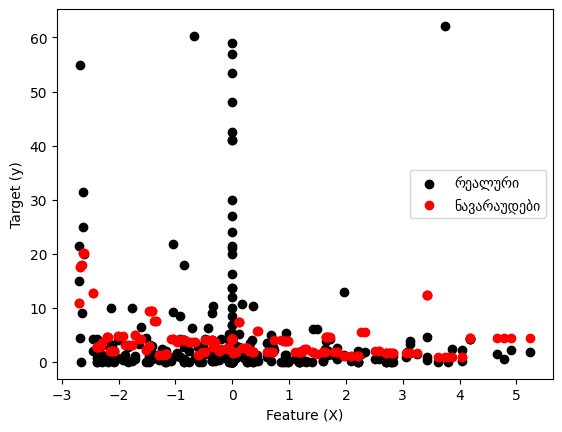

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

# ავარჩიოთ თვისება და სამიზნე ცვლადი, ამ შემთხვევაში ავირჩიე დედავარსკვლავის ასაკი და ეგზოპლანეტის მასა
X = df[['star_age']]  
y = df['mass']    

# სამიზნე ცვლადიდან გამოტოვებული მნიშვნელობების წაშლა
y_imputer = SimpleImputer(strategy='mean')
y_imputed = y_imputer.fit_transform(y.values.reshape(-1, 1))
y = y_imputed.flatten()

# უსასრულო მნიშვნელობების წაშლა X-დან
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# X-ში გამოტოვებული მნიშვნელობების იმპუტაცია
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# X-ის სქეილინგი
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# მონაცემების დაყოფა სატრენინგო და სატესტო ნაწილებად
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# HistGradientBoostingRegressor მოდელის შექმნა და დატრენინგება
model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)

# სატესტო ნაწილზე პრედიქციის შექმნა
y_pred = model.predict(X_test)

# მოდელის ეფექტურობის შეფასება mse–თი
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# გამოვთვალოთ სამიზნე ცვლადში გადახრის პროპორციულობა
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

# შედეგების ვიზუალიზაცია გაფანტულობის დიაგრამის გამოყენებით
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='black', label='რეალური')
plt.scatter(X_test, y_pred, color='red', label='ნავარაუდები')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()

In [3]:
# ჩავანაცვლოთ უსასრულო მნიშვნელობები NaN-ით
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# წავშალოთ NaN მნიშვნელობების შემცველი ჩანაწერები
df = df.dropna(subset=['semi_major_axis_error_max'])
#ვიპოვოთ ყველაზე დიდი მნიშვნელობა მოცემული სვეტის ჩანაწერებში, რათა გავიგოთ გამოსადეგია თუ არა მოცემული სვეტი X-ად მრავალცვლადიანი რეგრესიის მოდელის აგების დროს
max_value_semi_major_axis_error_max = df['semi_major_axis_error_max'].max()
print(max_value_semi_major_axis_error_max)


300.0


In [4]:
#იგივე გავიმეოროთ radius_error_min სვეტის შემთხვევაშიც
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna(subset=['radius_error_min'])
max_value_radius_error_min = df['radius_error_min'].max()
print(max_value_radius_error_min)

1.338212754


C:\Users\user\AppData\Local\Temp\ipykernel_732\308650551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [5]:
#შევამოწმოთ star_radius_error_max სვეტიც
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna(subset=['star_radius_error_max'])
max_value_star_radius_error_max= df['star_radius_error_max'].max()
print(max_value_star_radius_error_max)


0.57


Mean Squared Error: 27.493909734658658
R-squared: 0.06257631582069334


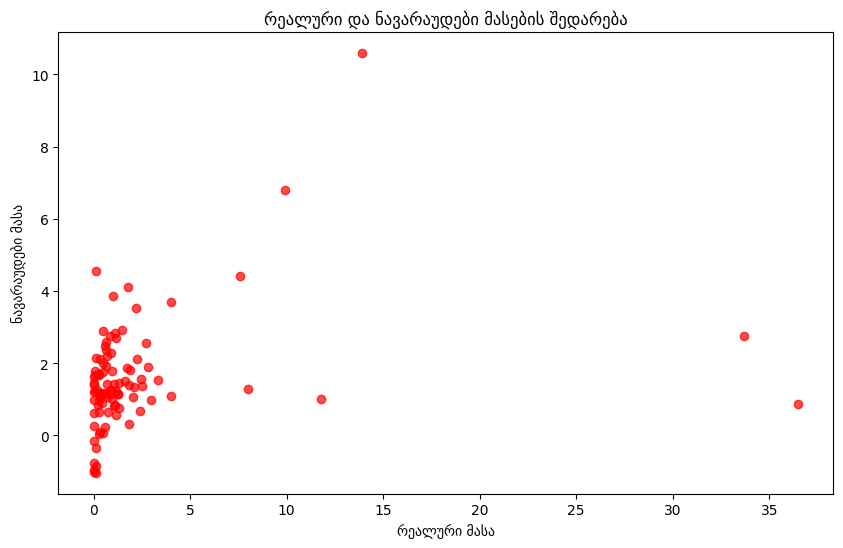

In [6]:
#ავაგოთ მრავალცვლადიანი რეგრესიის მოდელი
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# mass სვეტი გავფილტროთ NaN მნიშვნელობებისგან
df = df.dropna(subset=['mass'])

# X-ს მივანიჭოთ რამდენიმე თვისება და y განვსაზღვროთ, როგორც სამიზნე ცვლადი
X = df[['semi_major_axis_error_max', 'radius_error_min', 'star_radius_error_max']]
y = df['mass']

# დავყოთ მონაცემები სატრენინგო და სატესტო ნაწილებად
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# HistGradientBoostingRegressor მოდელი შევქმნათ და დავატრენინგოთ
model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)

# სატესტო ნაწილისთვის შევქმნათ პრედიქცია
y_pred = model.predict(X_test)

# შევაფასოთ მოდელის ეფექტურობა mse-თი და r_squared-ით
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

#მოვახდინოთ შედეგების ვიზუალიზება გაფანტულობის დიაგრამის გამოყენებით
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='red')
plt.title('რეალური და ნავარაუდები მასების შედარება')
plt.xlabel('რეალური მასა')
plt.ylabel('ნავარაუდები მასა')
plt.show()

Mean Squared Error: 43.4244855813473
R-squared: -0.48058757921732


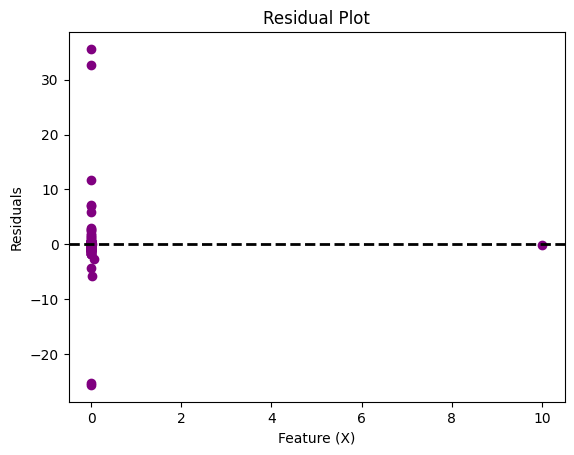

In [7]:
#გადაწყვეტილების ხის რეგრესიის მოდელი
from sklearn.tree import DecisionTreeRegressor

# ავირჩიოთ X-ად 'semi_major_axis_error_max' და y-ად 'მასა'
X = df[['semi_major_axis_error_max']]  
y = df['mass']  

# დავყოთ მონაცემები სატრენინგო და სატესტო ნაწილებად
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# შევქმნათ და დავატრენინგოთ გადაწყვეტილების ხის რეგრესიის მოდელი
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# შევქმნათ პრედიქციები სატესტო ნაწილისთვის
y_pred = model.predict(X_test)

# შევაფასოთ მოდელის ეფექტურობა mse და r_squared-ის გამოყენებით
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

# მოვახდინოთ შედეგების ვიზუალიზება Residual დიაგრამით
residuals = y_test - y_pred
plt.scatter(X_test, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Feature (X)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [8]:
#ლოგისტიკური რეგრესიის მოდელი ტიტანიკის მონაცემთა ბაზისთვის
filename1 = 'titanic.csv'
df1 = pd.read_csv(filename1)
df1

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df1[['Pclass', 'Fare']]  # თვისებები
y = df1['2urvived']  # სამიზნე ცვლადი

# სატრენინგო და სატესტო მონაცემებად დაყოფა
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ლოგისიკური რეგრესიის მოდელის შექმნა და დატრენინგება
model = LogisticRegression()
model.fit(X_train, y_train)

# Mპრედიქციების შექმნა სატესტო ნაწილზე
y_pred = model.predict(X_test)

# მოდელის სიზუსტის და ეფექტურობის შეფასება
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.7022900763358778
Confusion Matrix:
 [[181   8]
 [ 70   3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.96      0.82       189
           1       0.27      0.04      0.07        73

    accuracy                           0.70       262
   macro avg       0.50      0.50      0.45       262
weighted avg       0.60      0.70      0.61       262



In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df1[['Pclass', 'Fare']]  # თვისებები
y = df1['2urvived']  # სამიზნე ცვლადი

# ვყოფთ სატრენინგო და სატესტო ნაწილებად
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# გადაწყვეტილების ხის კლასიფიკაციის მოდელი 
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# პრედიქციები სატესტო ნაწილზე
y_pred = model.predict(X_test)

# მოდელის ეფექტურობის გაზომვა
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report_str)


Accuracy: 0.732824427480916
Confusion Matrix:
 [[175  14]
 [ 56  17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.93      0.83       189
           1       0.55      0.23      0.33        73

    accuracy                           0.73       262
   macro avg       0.65      0.58      0.58       262
weighted avg       0.70      0.73      0.69       262

